# Megaline Statistical Analysis

## Introduction

This assessment will analyze the revenue performance of Megaline's two prepaid plans, Surf and Ultimate, aiming to optimize the advertising budget within the commercial department.

A preliminary examination will be conducted using data from a subset of 500 Megaline clients. This dataset includes client demographics, plan subscriptions, and usage details such as call minutes and text message counts from 2018. The objective is to analyze client behavior and identify which prepaid plan generates higher revenue for strategic planning purposes.

The goal of this analysis is to identify any significant differences in revenue generated between the Surf and Ultimate subscription plans.

The key steps for conducting this analysis are as follows:
1. Importing raw data
2. Reviewing data for potential inaccuracies and performing necessary cleanup
3. Conducting data cleaning procedures
3. Merging data tables into a unified, well-formatted dataset
4. Analyzing user behavior in terms of calls, messages, and internet usage across the two plans
5. Evaluating revenue metrics
6. Formulating and testing hypotheses based on revenue findings

## Initialization

In [84]:
# Loading all the libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from math import factorial
from scipy import stats as st

## Load data

In [85]:
# Load the data files into different DataFrames

try: 
    calls_df = pd.read_csv('../data/megaline_calls.csv')
    internet_df = pd.read_csv('../data/megaline_internet.csv')
    messages_df = pd.read_csv('../data/megaline_messages.csv')
    plans_df = pd.read_csv('../data/megaline_plans.csv')
    users_df = pd.read_csv('../data/megaline_users.csv')

except FileNotFoundError as Error:
    print(f"Error reading file: {Error}. Try again!")

## Initial Data Observations

In [86]:
calls_df.info() # observing the data type, column titles, and potential missing values for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [87]:
calls_df.head() # Look at first 5 rows

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [88]:
internet_df.info() # observing the data type, column titles, and potential missing values for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [89]:
internet_df.head() # Look at first 5 rows

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [90]:
messages_df.info() # observing the data type, column titles, and potential missing values for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [91]:
messages_df.head() # Look at first 5 rows

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [92]:
plans_df.info() # observing the data type, column titles, and potential missing values for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [93]:
plans_df.head() # Look at first 5 rows

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [94]:
users_df.info() # observing the data type, column titles, and potential missing values for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [95]:
users_df.head() # Look at first 5 rows

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [96]:
# Print the general/summary information about the plans' DataFrame
plans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [97]:
# Print a sample of data for plans
plans_df

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


**Observations**


The `plans_df` contains just two entries, each representing one of the two available plans: surf and ultimate. It details the allowances for messages, data usage, and minutes, along with their monthly charges and additional costs for exceeding limits.

I suggest adding two new columns: one for an `id` and another for `gb_per_month_included`. This addition aligns with the existing `usd_per_gb` column, indicating the need for a corresponding GB column. Furthermore, an `id` column is essential for linking these plans to other tables seamlessly.

Furthermore, I propose reorganizing the table to prioritize the plan name as the first column. This reordering will make it easier to compare plans effectively during later stages of analysis.

## Data Cleaning

In [98]:
plans_df['plan_id'] = [1, 2] # adding id column with ids for each plan
plans_df # look at table

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,plan_id
0,50,15360,500,20,10,0.03,0.03,surf,1
1,1000,30720,3000,70,7,0.01,0.01,ultimate,2


In [99]:
plans_df['gb_per_month_included'] = plans_df['mb_per_month_included']/1024 # adding a column for 'gb_per_month_included'
plans_df['gb_per_month_included'] = plans_df['gb_per_month_included'].astype('int') # converting new col 'gb_per_month_included' to integer type

# Rearranging col order
plans_df = plans_df[['plan_id', 'plan_name', 'messages_included', 'gb_per_month_included','mb_per_month_included', 'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute']]

plans_df # look at table

,plan_id,plan_name,messages_included,gb_per_month_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1,surf,50,15,15360,500,20,10,0.03,0.03
1,2,ultimate,1000,30,30720,3000,70,7,0.01,0.01


In [100]:
# Print the general/summary information about the users' DataFrame
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [101]:
# Print a sample of data for users
users_df

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


**Observations**

After reviewing the general information about the `users_df` table, I've identified several areas that require attention:

1. The `reg_date` column is currently in object data type, suggesting it contains string data. To streamline date comparison and analysis, I propose converting this column to a datetime data type. Moreover, I recommend relabeling this column as 'sub_date' to better signify it as the subscription date. Additionally, it would be beneficial to create separate columns for the month, day, and year of each user's subscription.

2. Although the `plan` column exists, it would be advantageous to introduce a `plan_id` column in the `users_df` table. This 'plan_id' will facilitate seamless referencing and integration with the 'plans_df' table.

3. The `churn_date` column has missing values, which can be represented as 0 to denote active customers. I propose converting the values in this column to the datetime data type. Although this will result in a mix of datetime and integer values, treating 0 as the date 1970-01-01 ensures consistency and aids in further analysis. This enhancement will contribute to maintaining data integrity and enabling more comprehensive analysis.

By addressing these issues, we can enhance the usability and integrity of the `users_df` table for future data operations and analysis.

In [102]:
users_df['churn_date'].isna().sum() # Find number of missing 'churn_date' values

466

In [103]:
users_df['user_id'].duplicated().sum() # Looking for duplicate users in the data

0

In [104]:
users_df['churn_date'] = users_df['churn_date'].fillna(0) # fill missing values with a 0

In [105]:
users_df['churn_date'].isna().sum() # Check missing values again

0

In [106]:
users_df['plan_id'] = np.where(users_df['plan'] == 'surf', 1, 2) # add 'plan_id' based on value in the 'plan' col

In [107]:
users_df # look at data

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,plan_id
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,0,2
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,1
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,0,1
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,0,1
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,0,1
...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,0,1
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,0,1
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,0,2
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,0,1


In [108]:
users_df['sub_date'] = pd.to_datetime(users_df['reg_date']) # converting reg_date from object to datatime datatype
users_df = users_df.drop('reg_date', axis=1) # drop the original reg_date & keep the new 'sub_date' col

In [109]:
users_df['drop_date'] = pd.to_datetime(users_df['churn_date']) # converting churn_date to datatime data type

In [110]:
users_df = users_df.drop('churn_date', axis=1) # drop the original churn_date & keep the new 'drop_date' col

In [111]:
users_df['sub_year'] = users_df['sub_date'].dt.year
users_df['sub_month'] = users_df['sub_date'].dt.month

users_df['drop_year'] = users_df['drop_date'].dt.year
users_df['drop_month'] = users_df['drop_date'].dt.month

In [112]:
users_df = users_df[['user_id', 'first_name', 'last_name', 'age','city', 'plan', 'plan_id', 'sub_date', 'sub_year', 'sub_month', 'drop_date', 'drop_year', 'drop_month']]

In [113]:
users_df # look at data

,user_id,first_name,last_name,age,city,plan,plan_id,sub_date,sub_year,sub_month,drop_date,drop_year,drop_month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,2,2018-12-24,2018,12,1970-01-01,1970,1
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,1,2018-08-13,2018,8,1970-01-01,1970,1
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",surf,1,2018-10-21,2018,10,1970-01-01,1970,1
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",surf,1,2018-01-28,2018,1,1970-01-01,1970,1
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",surf,1,2018-05-23,2018,5,1970-01-01,1970,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,1,2018-09-04,2018,9,1970-01-01,1970,1
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",surf,1,2018-02-20,2018,2,1970-01-01,1970,1
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",ultimate,2,2018-12-10,2018,12,1970-01-01,1970,1
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,1,2018-02-04,2018,2,1970-01-01,1970,1


In [114]:
# Print the general/summary information about the calls' DataFrame
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [115]:
# Print a sample of data for calls
calls_df

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


 **Observations**
 
After examining the general information regarding the `calls_df` table, I've noted several areas that require attention:

1. The `id` column exhibits an unusual format, resulting in an object data type. I aim to convert this to a standard integer data type for clarity and consistency. Additionally, I will conduct a check for duplicates to ensure there are no repeated calls in the dataset. Calls should be unique, without any duplicates.

2. I've noticed duplicate entries in the `user_id` column. This is acceptable as users can make multiple calls, so duplicate `user_id` occurrences are expected and valid.

3. The `call_date` column needs to be converted to a datetime data type for proper date handling. Furthermore, I intend to enhance the dataset by introducing new columns such as `call_month` and `call_year` to provide more detailed temporal information related to each call.

In [116]:
calls_df['id'] = calls_df['id'].astype('int') # convert the call_id to an integer data type

In [117]:
calls_df['id'].duplicated().sum() # Finding the sum of duplicate values

0

In [118]:
calls_df['call_date'] = pd.to_datetime(calls_df['call_date']) # change the call_date data type

calls_df # check the data

,id,user_id,call_date,duration
0,100093,1000,2018-12-27,8.52
1,1000145,1000,2018-12-27,13.66
2,1000247,1000,2018-12-27,14.48
3,1000309,1000,2018-12-28,5.76
4,1000380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499199,1499,2018-11-21,8.72
137731,1499200,1499,2018-10-20,10.89
137732,1499201,1499,2018-09-21,8.12
137733,1499202,1499,2018-10-10,0.37


In [119]:
calls_df['call_year'] = calls_df['call_date'].dt.year # creating a call_year column
calls_df['call_month'] = calls_df['call_date'].dt.month # creating a call_month column
calls_df['duration'] = np.ceil(calls_df['duration']) # rounding up call duartion to next whole number

In [120]:
# Reordering the columns
call_columns_reordered = ['id', 'user_id', 'call_date', 'call_year', 'call_month', 'duration']
calls_df = calls_df[call_columns_reordered]
calls_df

,id,user_id,call_date,call_year,call_month,duration
0,100093,1000,2018-12-27,2018,12,9.0
1,1000145,1000,2018-12-27,2018,12,14.0
2,1000247,1000,2018-12-27,2018,12,15.0
3,1000309,1000,2018-12-28,2018,12,6.0
4,1000380,1000,2018-12-30,2018,12,5.0
...,...,...,...,...,...,...
137730,1499199,1499,2018-11-21,2018,11,9.0
137731,1499200,1499,2018-10-20,2018,10,11.0
137732,1499201,1499,2018-09-21,2018,9,9.0
137733,1499202,1499,2018-10-10,2018,10,1.0


In [121]:
# Print the general/summary information about the messages' DataFrame
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [122]:
# Print a sample of data for messages
messages_df

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


 **Observations**
 
Just like the `calls_df`, upon reviewing the overall details of the `messages_df` table, I've identified several parallel issues:

1. The `id` column needs to be converted from its current object data type to an integer data type. I also want to double check for any duplicate values in the 'id' column, since messages are unique.
2. The `message_date` column, currently in object data type, presumably as a string, should be converted to a datetime data type. Additionally, I propose adding separate columns for `message_year` and `message_month` to enhance temporal analysis and organization within the dataset.

In [123]:
messages_df['id'] = messages_df['id'].astype('int') # convert the data type for the 'id' col
messages_df['id'].duplicated().sum() # check for the sum of duplicate values in the 'id' col

0

In [124]:
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'])
messages_df

,id,user_id,message_date
0,1000125,1000,2018-12-27
1,1000160,1000,2018-12-31
2,1000223,1000,2018-12-31
3,1000251,1000,2018-12-27
4,1000255,1000,2018-12-26
...,...,...,...
76046,1497526,1497,2018-12-24
76047,1497536,1497,2018-12-24
76048,1497547,1497,2018-12-31
76049,1497558,1497,2018-12-24


In [125]:
messages_df['message_year'] = messages_df['message_date'].dt.year
messages_df['message_month'] = messages_df['message_date'].dt.month
messages_df

,id,user_id,message_date,message_year,message_month
0,1000125,1000,2018-12-27,2018,12
1,1000160,1000,2018-12-31,2018,12
2,1000223,1000,2018-12-31,2018,12
3,1000251,1000,2018-12-27,2018,12
4,1000255,1000,2018-12-26,2018,12
...,...,...,...,...,...
76046,1497526,1497,2018-12-24,2018,12
76047,1497536,1497,2018-12-24,2018,12
76048,1497547,1497,2018-12-31,2018,12
76049,1497558,1497,2018-12-24,2018,12


In [126]:
# Print the general/summary information about the internet DataFrame
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [127]:
# Print a sample of data for the internet traffic
internet_df

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


**Observations**

There are several issues that require attention with the `internet_df` table:

1. The `id` column needs to be adjusted to generate IDs with an integer data type instead of an object type.

2. It's crucial to search for any potential duplicate values in the `id` column, as internet sessions should be unique, and having identical sessions is not possible.

3. The `session_date` column needs to undergo conversion from its current object data type to a datetime data type to ensure accurate date handling and facilitate thorough analysis. Additionally, I aim to enhance the dataset by including separate columns for `session_year` and `session_month` for each row of data.

4. I aim to introduce a new column named `gb_used` derived from the `mb_used` column, as the comparison between plans is typically done in gigabytes rather than megabytes.

In [128]:
internet_df['id'] = internet_df['id'].astype('int') # converting the id to the integer data type

In [129]:
internet_df['id'].duplicated().sum() # searching for duplicate ids

0

In [130]:
internet_df['session_date'] = pd.to_datetime(internet_df['session_date']) # converting the data type of the 'session_date' col

internet_df

,id,user_id,session_date,mb_used
0,100013,1000,2018-12-29,89.86
1,1000204,1000,2018-12-31,0.00
2,1000379,1000,2018-12-28,660.40
3,1000413,1000,2018-12-26,270.99
4,1000442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499215,1499,2018-10-20,218.06
104821,1499216,1499,2018-12-30,304.72
104822,1499217,1499,2018-09-22,292.75
104823,1499218,1499,2018-12-07,0.00


In [131]:
internet_df['session_year'] = internet_df['session_date'].dt.year
internet_df['session_month'] = internet_df['session_date'].dt.month
internet_df['mb_used'] = np.ceil(internet_df['mb_used'])
internet_df['gb_used'] = internet_df['mb_used'] / 1024 # dividing mb_used by 1024 to determine gb_used
internet_df['gb_used'] = np.ceil(internet_df['gb_used']) # rounding to the nearest whole number

In [132]:
# reordering columns
internet_reordered_columns = ['id', 'user_id', 'session_date', 'session_year', 'session_month', 'mb_used', 'gb_used']

In [133]:
internet_df = internet_df[internet_reordered_columns]

internet_df

,id,user_id,session_date,session_year,session_month,mb_used,gb_used
0,100013,1000,2018-12-29,2018,12,90.0,1.0
1,1000204,1000,2018-12-31,2018,12,0.0,0.0
2,1000379,1000,2018-12-28,2018,12,661.0,1.0
3,1000413,1000,2018-12-26,2018,12,271.0,1.0
4,1000442,1000,2018-12-27,2018,12,881.0,1.0
...,...,...,...,...,...,...,...
104820,1499215,1499,2018-10-20,2018,10,219.0,1.0
104821,1499216,1499,2018-12-30,2018,12,305.0,1.0
104822,1499217,1499,2018-09-22,2018,9,293.0,1.0
104823,1499218,1499,2018-12-07,2018,12,0.0,0.0


In [134]:
# Print out the plan conditions one more time
plans_df

,plan_id,plan_name,messages_included,gb_per_month_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1,surf,50,15,15360,500,20,10,0.03,0.03
1,2,ultimate,1000,30,30720,3000,70,7,0.01,0.01


## Data Aggregation

In [135]:
# Calculate the number of calls made by each user per month

calls_per_month_df = calls_df.groupby(['user_id', 'call_month']).size().reset_index(name='num_calls')
calls_per_month_df

,user_id,call_month,num_calls
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [136]:
# Calculate the amount of minutes spent by each user per month

minutes_per_month_df = calls_df.groupby(['user_id', 'call_month'])['duration'].sum().reset_index(name='call_minutes')
minutes_per_month_df = minutes_per_month_df

In [137]:
# Calculate the number of messages sent by each user per month

messages_per_month_df = messages_df.groupby(['user_id', 'message_month']).size().reset_index(name='num_messages')
messages_per_month_df

,user_id,message_month,num_messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [138]:
# Calculate the volume of internet traffic used by each user per month

internet_use_per_month_df = internet_df.groupby(['user_id', 'session_month'])[['mb_used', 'gb_used']].sum().reset_index()
internet_use_per_month_df['gb_used'] = np.ceil(internet_use_per_month_df['mb_used'] / 1024) # rounding to the nearest whole number
internet_use_per_month_df.columns = ['user_id', 'internet_use_month', 'internet_used_mb', 'internet_used_gb']
internet_use_per_month_df

,user_id,internet_use_month,internet_used_mb,internet_used_gb
0,1000,12,1903.0,2.0
1,1001,8,6929.0,7.0
2,1001,9,13333.0,14.0
3,1001,10,22356.0,22.0
4,1001,11,18524.0,19.0
...,...,...,...,...
2272,1498,12,23160.0,23.0
2273,1499,9,13004.0,13.0
2274,1499,10,19515.0,20.0
2275,1499,11,16834.0,17.0


In [139]:
# Merge the data for calls, minutes, messages, internet based on user_id and month

calls_minutes_internet_df = calls_per_month_df.merge(minutes_per_month_df, on=['user_id', 'call_month'], how='outer')
calls_minutes_internet_df = calls_minutes_internet_df.merge(messages_per_month_df, left_on=['user_id', 'call_month'], right_on=['user_id', 'message_month'], how='outer')
calls_minutes_internet_df = calls_minutes_internet_df.merge(internet_use_per_month_df, left_on=['user_id', 'call_month'], right_on=['user_id', 'internet_use_month'], how='outer')
calls_minutes_internet_df = calls_minutes_internet_df.drop(['message_month', 'internet_use_month'], axis='columns')


In [140]:
calls_minutes_internet_df 

,user_id,call_month,num_calls,call_minutes,num_messages,internet_used_mb,internet_used_gb
0,1000,12.0,16.0,124.0,11.0,1903.0,2.0
1,1001,8.0,27.0,182.0,30.0,6929.0,7.0
2,1001,9.0,49.0,315.0,44.0,13333.0,14.0
3,1001,10.0,65.0,393.0,53.0,22356.0,22.0
4,1001,11.0,64.0,426.0,36.0,18524.0,19.0
...,...,...,...,...,...,...,...
2320,1311,NaN,NaN,NaN,NaN,1501.0,2.0
2321,1349,NaN,NaN,NaN,NaN,13105.0,13.0
2322,1349,NaN,NaN,NaN,NaN,17145.0,17.0
2323,1349,NaN,NaN,NaN,NaN,13052.0,13.0


In [141]:
# Add the plan information

calls_minutes_internet_df = users_df.merge(calls_minutes_internet_df, on='user_id').drop(['first_name', 'last_name', 'age', 'sub_date', 'sub_year', 'sub_month', 'drop_date', 'drop_year', 'drop_month'], axis='columns')


In [142]:
# Rename the call_month column to month, since it is now being used for minutes, messages, and internet use

calls_minutes_internet_df = calls_minutes_internet_df.rename(columns={'call_month': 'month'})

In [143]:
# Fill in missing values after the merging

print(calls_minutes_internet_df.isna().sum()) # See number of missing values

user_id               0
city                  0
plan                  0
plan_id               0
month                67
num_calls            67
call_minutes         67
num_messages        519
internet_used_mb     48
internet_used_gb     48
dtype: int64


In [144]:
# Filling missing month, num_calls, call_minutes, num_messages, and internet_used with 0

calls_minutes_internet_df = calls_minutes_internet_df.fillna(0)

In [145]:
# Checking missing values again

calls_minutes_internet_df.isna().sum()

user_id             0
city                0
plan                0
plan_id             0
month               0
num_calls           0
call_minutes        0
num_messages        0
internet_used_mb    0
internet_used_gb    0
dtype: int64

In [146]:
# Converting float values from after merge to int

calls_minutes_internet_df[['month', 'num_calls', 'num_messages']] = calls_minutes_internet_df[['month', 'num_calls', 'num_messages']].astype('int')


In [147]:
# filtering out month == 0, produced from earlier code where missing values were replaced

calls_minutes_internet_df = calls_minutes_internet_df[calls_minutes_internet_df['month'] > 0].reset_index(drop=True) 

In [148]:
calls_minutes_internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2258 entries, 0 to 2257
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           2258 non-null   int64  
 1   city              2258 non-null   object 
 2   plan              2258 non-null   object 
 3   plan_id           2258 non-null   int64  
 4   month             2258 non-null   int64  
 5   num_calls         2258 non-null   int64  
 6   call_minutes      2258 non-null   float64
 7   num_messages      2258 non-null   int64  
 8   internet_used_mb  2258 non-null   float64
 9   internet_used_gb  2258 non-null   float64
dtypes: float64(3), int64(5), object(2)
memory usage: 176.5+ KB


In [149]:
# Looking at dataframe to confirm everything looks good

calls_minutes_internet_df

,user_id,city,plan,plan_id,month,num_calls,call_minutes,num_messages,internet_used_mb,internet_used_gb
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,2,12,16,124.0,11,1903.0,2.0
1,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,1,8,27,182.0,30,6929.0,7.0
2,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,1,9,49,315.0,44,13333.0,14.0
3,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,1,10,65,393.0,53,22356.0,22.0
4,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,1,11,64,426.0,36,18524.0,19.0
...,...,...,...,...,...,...,...,...,...,...
2253,1498,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,1,12,39,339.0,0,23160.0,23.0
2254,1499,"Orlando-Kissimmee-Sanford, FL MSA",surf,1,9,41,346.0,0,13004.0,13.0
2255,1499,"Orlando-Kissimmee-Sanford, FL MSA",surf,1,10,53,385.0,0,19515.0,20.0
2256,1499,"Orlando-Kissimmee-Sanford, FL MSA",surf,1,11,45,308.0,0,16834.0,17.0


In [150]:
# Calculate the monthly revenue for each user

# Creating new columns with the difference (subtracting what user used - plan credentials)

def calculate_plan_differences(df):
    def calculate_diff_minutes(row):
        if row['plan_id'] == 1:
            return np.ceil(row['call_minutes'] - 500)
        else:
            return np.ceil(row['call_minutes'] - 3000)

    def calculate_diff_messages(row):
        if row['plan_id'] == 1:
            return row['num_messages'] - 50
        else:
            return row['num_messages'] - 1000

    def calculate_diff_internet_used_gb(row):
        if row['plan_id'] == 1:
            return np.ceil(row['internet_used_gb'] - 15)
        else:
            return np.ceil(row['internet_used_gb'] - 30)

    calls_minutes_internet_df['diff_minutes'] = calls_minutes_internet_df.apply(calculate_diff_minutes, axis=1)
    calls_minutes_internet_df['diff_messages'] = calls_minutes_internet_df.apply(calculate_diff_messages, axis=1)
    calls_minutes_internet_df['diff_internet_used_gb'] = calls_minutes_internet_df.apply(calculate_diff_internet_used_gb, axis=1)
    
    
def calculate_revenue(row):
    if row['plan_id'] == 1:
        row['rev_minutes'] = row['diff_minutes'] * 0.03
        row['rev_messages'] = row['diff_messages'] * 0.03
        row['rev_internet_used_gb'] = row['diff_internet_used_gb'] * 10
    else:
        row['rev_minutes'] = row['diff_minutes'] * 0.01
        row['rev_messages'] = row['diff_messages'] * 0.01
        row['rev_internet_used_gb'] = row['diff_internet_used_gb'] * 7

    return row


# Apply fns
calculate_plan_differences(calls_minutes_internet_df)
calls_minutes_internet_df = calls_minutes_internet_df.apply(calculate_revenue, axis=1)


# Function for removing duplicates before data aggregation
def remove_negatives(x):
    if x < 0:
        return 0
    else:
        return x

columns_to_check = ['rev_minutes', 'rev_messages', 'rev_internet_used_gb']
for col in columns_to_check:
    calls_minutes_internet_df[col] = calls_minutes_internet_df[col].apply(remove_negatives)

    
# Function for adding the monthly_cost to the dataframe
def calculate_monthly_cost(plan_id):
    if plan_id == 1:
        return 20
    elif plan_id == 2:
        return 70
    else:
        return 0 

calls_minutes_internet_df['monthly_cost'] = calls_minutes_internet_df['plan_id'].apply(calculate_monthly_cost)


# Calculate total revenue
calls_minutes_internet_df['total_revenue'] = calls_minutes_internet_df['rev_minutes'] + calls_minutes_internet_df['rev_messages'] + calls_minutes_internet_df['rev_internet_used_gb'] + calls_minutes_internet_df['monthly_cost']


# Remove uncessary columns
calls_minutes_internet_df = calls_minutes_internet_df.drop(['diff_minutes', 'diff_messages', 'diff_internet_used_gb', 'rev_minutes', 'rev_messages', 'rev_internet_used_gb', 'monthly_cost'], axis='columns')

calls_minutes_internet_df


,user_id,city,plan,plan_id,month,num_calls,call_minutes,num_messages,internet_used_mb,internet_used_gb,total_revenue
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,2,12,16,124.0,11,1903.0,2.0,70.00
1,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,1,8,27,182.0,30,6929.0,7.0,20.00
2,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,1,9,49,315.0,44,13333.0,14.0,20.00
3,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,1,10,65,393.0,53,22356.0,22.0,90.09
4,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,1,11,64,426.0,36,18524.0,19.0,60.00
...,...,...,...,...,...,...,...,...,...,...,...
2253,1498,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,1,12,39,339.0,0,23160.0,23.0,100.00
2254,1499,"Orlando-Kissimmee-Sanford, FL MSA",surf,1,9,41,346.0,0,13004.0,13.0,20.00
2255,1499,"Orlando-Kissimmee-Sanford, FL MSA",surf,1,10,53,385.0,0,19515.0,20.0,70.00
2256,1499,"Orlando-Kissimmee-Sanford, FL MSA",surf,1,11,45,308.0,0,16834.0,17.0,40.00


## Data Observations: User Behavior

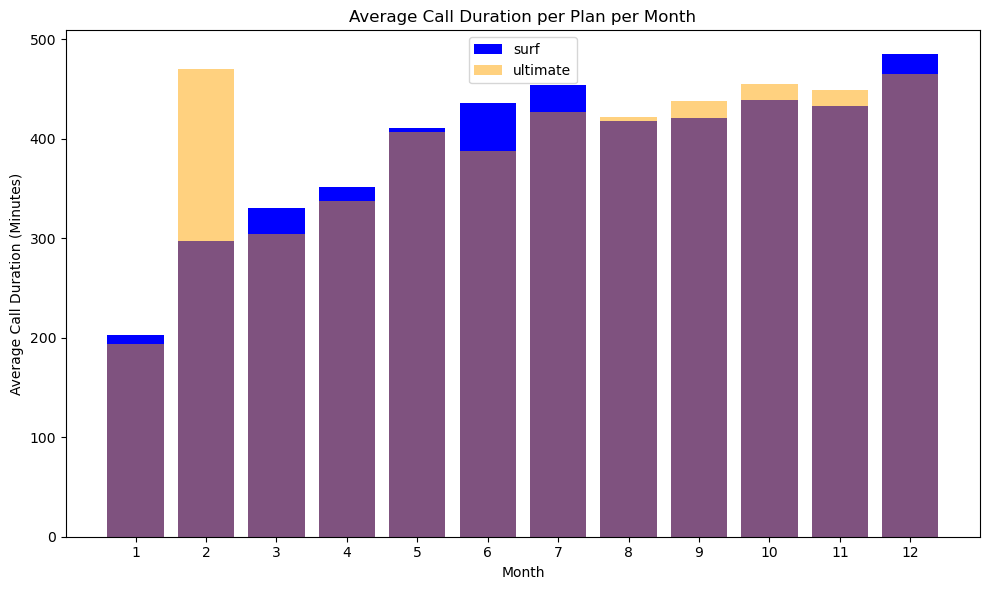

In [151]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.

# plan_id = 1 is surf, plan_id = 2 is ultimate
avg_call_duration = calls_minutes_internet_df.groupby(['plan_id', 'month'])['call_minutes'].mean().reset_index() # grouping the dataset
avg_call_duration_surf = avg_call_duration[avg_call_duration['plan_id'] == 1] # df for surf plan
avg_call_duration_ultimate = avg_call_duration[avg_call_duration['plan_id'] == 2] # df for ultimate plan


plt.figure(figsize=(10, 6))
plt.bar(avg_call_duration_surf['month'], avg_call_duration_surf['call_minutes'], label='surf', color='blue')
plt.bar(avg_call_duration_ultimate['month'], avg_call_duration_ultimate['call_minutes'], label='ultimate', color='orange', alpha=0.5)

plt.xlabel('Month')
plt.ylabel('Average Call Duration (Minutes)')
plt.title('Average Call Duration per Plan per Month')
plt.xticks(avg_call_duration_surf['month'])

plt.legend()
plt.tight_layout()
plt.show()

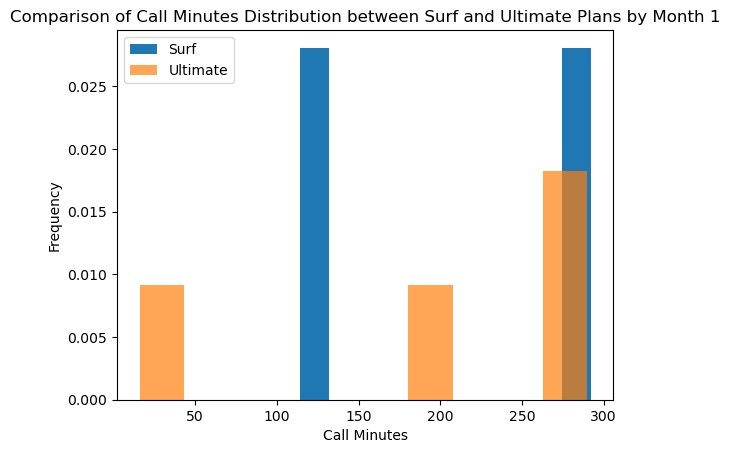

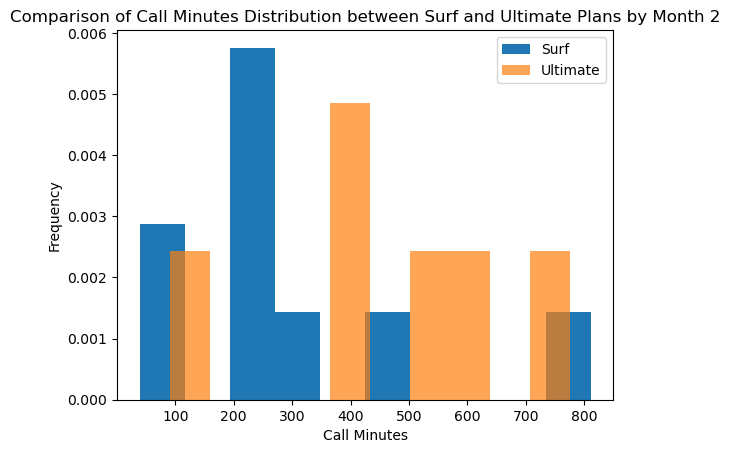

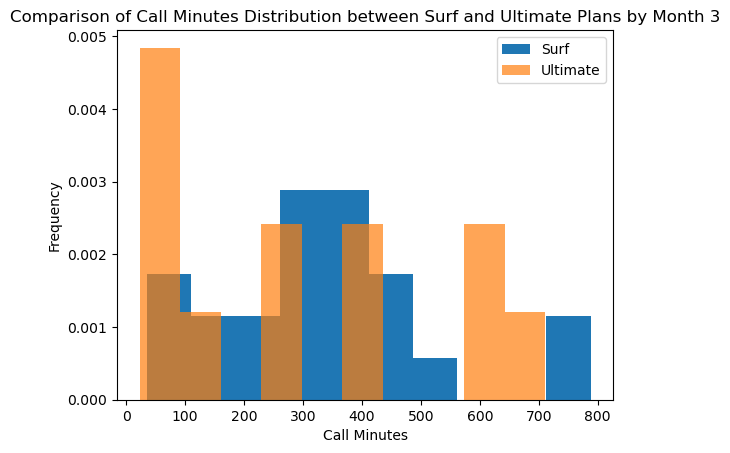

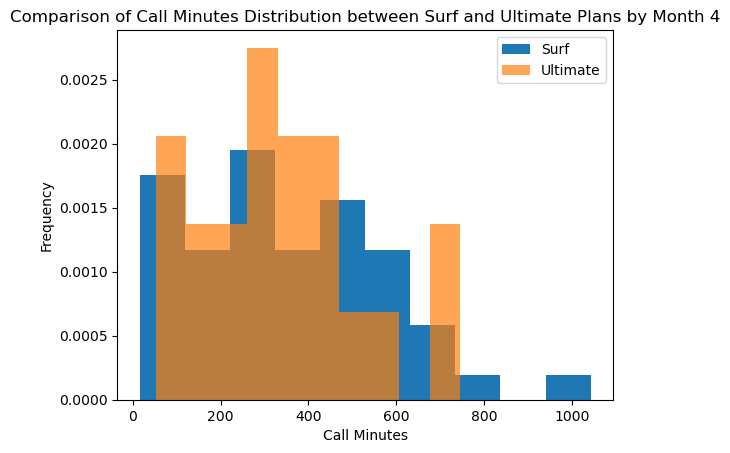

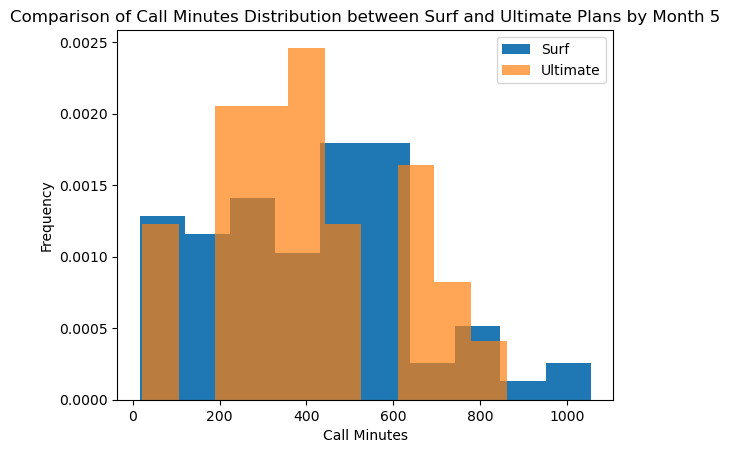

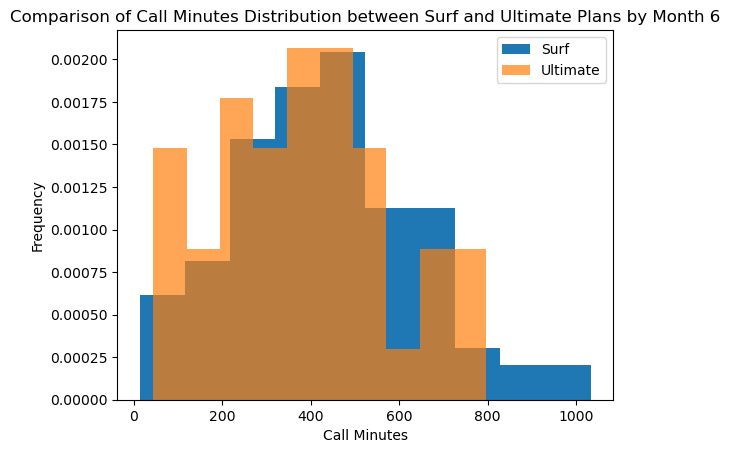

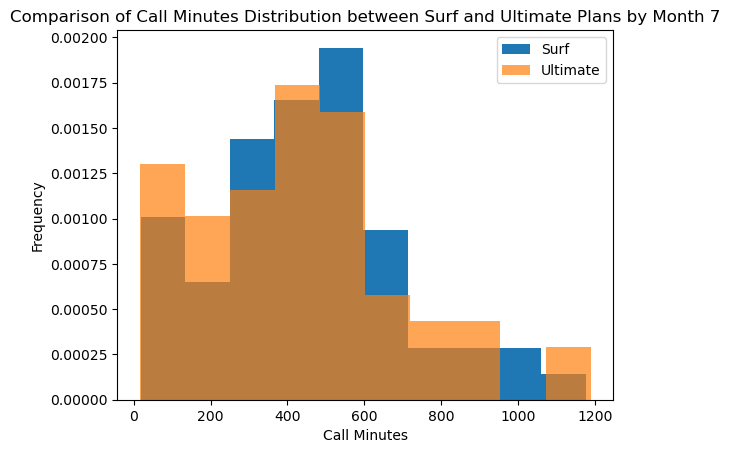

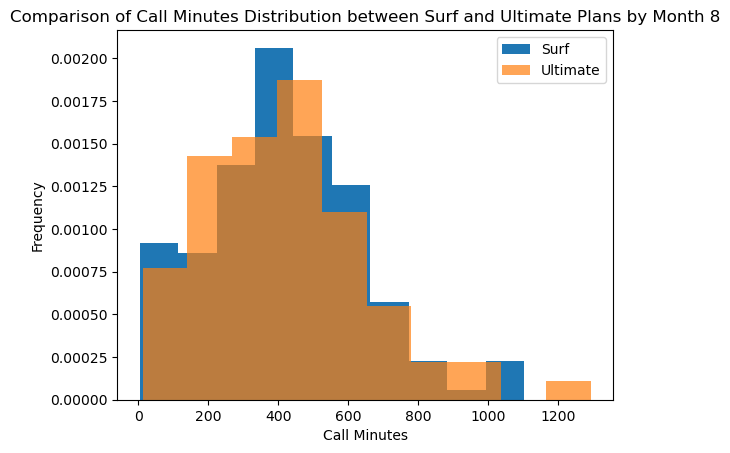

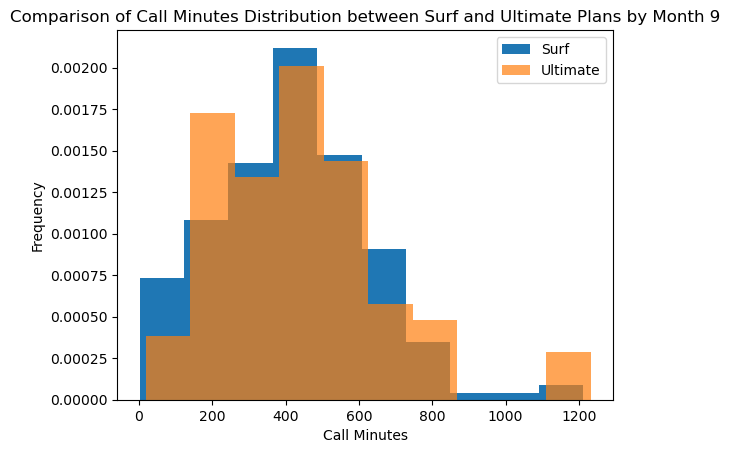

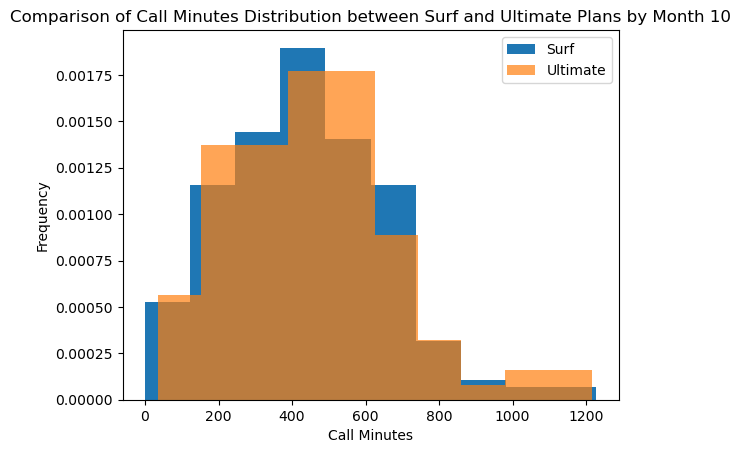

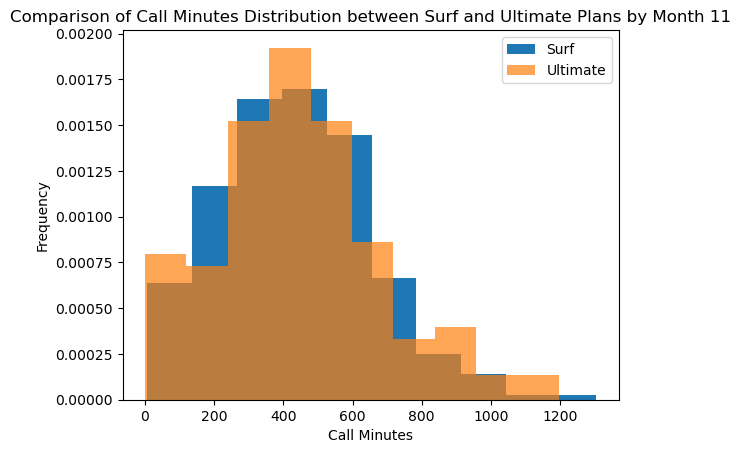

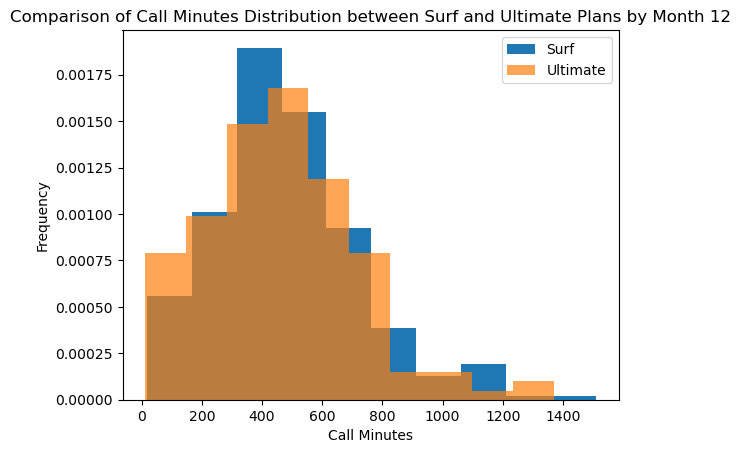

In [152]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.

# plan_id = 1 is surf, plan_id = 2 is ultimate
for month in range(1, 13):
    filtered_month = calls_minutes_internet_df[(calls_minutes_internet_df['plan_id'] == 1) & (calls_minutes_internet_df['month'] == month)]
    filtered_month['call_minutes'].plot(kind='hist', density=True, label='Surf')
    filtered_month = calls_minutes_internet_df[(calls_minutes_internet_df['plan_id'] == 2) & (calls_minutes_internet_df['month'] == month)]
    filtered_month['call_minutes'].plot(kind='hist', density=True, alpha=0.7, label="Ultimate")
    plt.xlabel('Call Minutes')
    plt.ylabel('Frequency')
    plt.title(f'Comparison of Call Minutes Distribution between Surf and Ultimate Plans by Month {month}')
    plt.legend()
    plt.show()


In [153]:
# Calculate the mean and the variance of the monthly call duration

call_minutes_dispersion = pd.DataFrame(calls_minutes_internet_df.groupby(['month', 'plan_id'])['call_minutes'].agg(['mean', 'var', 'std']))
call_minutes_dispersion

mean           var         std
month plan_id                                      
1     1        203.000000  15842.000000  125.865007
      2        193.500000  16572.333333  128.733575
2     1        297.000000  52226.500000  228.531179
      2        470.333333  54345.066667  233.120284
3     1        330.000000  35809.363636  189.233622
      2        304.250000  61984.931818  248.967732
4     1        351.540000  50866.743265  225.536567
      2        336.857143  34888.928571  186.785783
5     1        410.240000  56938.779459  238.618481
      2        406.241379  43841.046798  209.382537
6     1        435.791667  44094.061404  209.985860
      2        387.444444  37902.570707  194.685826
7     1        453.733333  59802.012325  244.544500
      2        427.067797  72563.374635  269.375898
8     1        417.849057  52122.749224  228.304072
      2        421.436620  53645.506640  231.614997
9     1        420.732984  44579.912538  211.139557
      2        437.511628  57070.464569  238.894254
10    1        438.991379  49326.952306  222.096718
      2        455.028571  52811.566484  229.807673
11    1        432.494585  48748.787108  220.791275
      2        448.730159  59479.782603  243.884773
12    1        484.501608  59882.373385  244.708752
      2        465.261745  60461.924270  245.890065

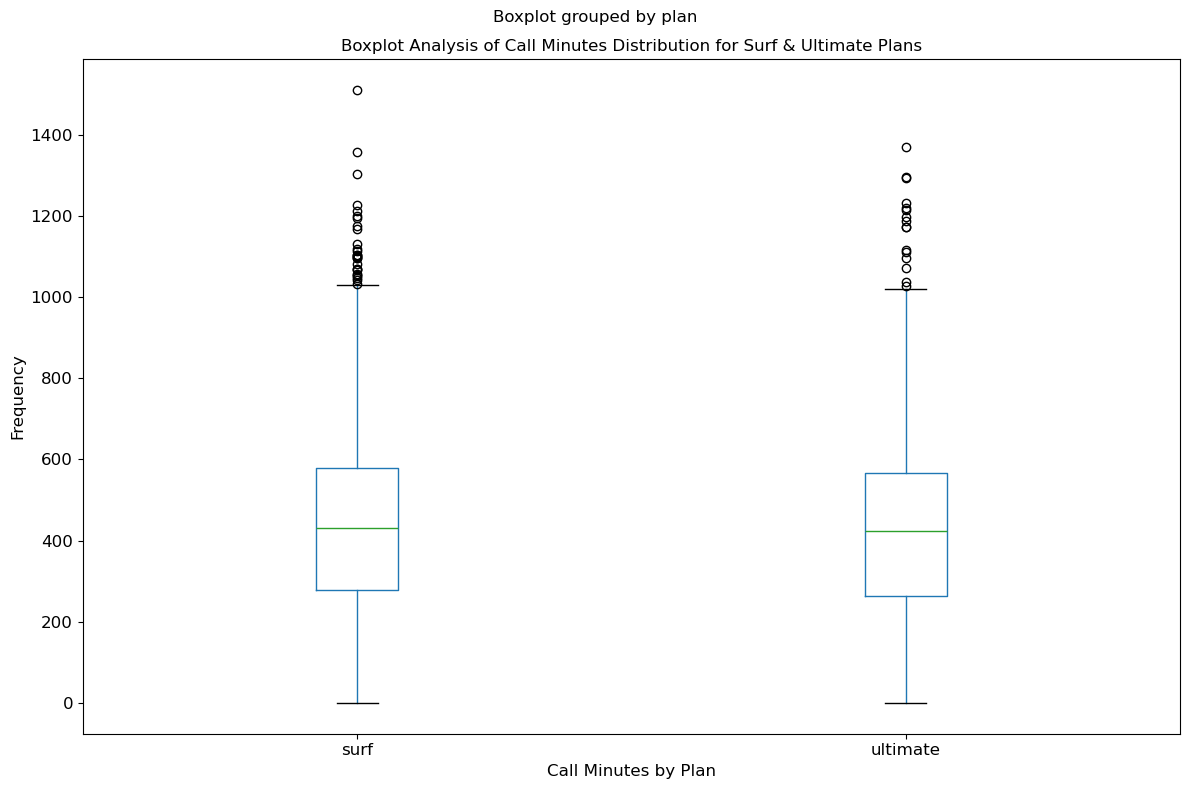

In [154]:
# Plot a boxplot to visualize the distribution of the monthly call duration

# Boxplot for Surf & Ultimate Plan
calls_minutes_internet_df.boxplot(['call_minutes'], by='plan', figsize=(12, 8), fontsize=12, grid=False)
plt.xlabel('Call Minutes by Plan', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Boxplot Analysis of Call Minutes Distribution for Surf & Ultimate Plans', fontsize=12)


plt.tight_layout()
plt.show()

In [155]:
avg_call_duration_ultimate.mean()

plan_id           2.000000
month             6.500000
call_minutes    396.138568
dtype: float64

 **Observations**

There is scant evidence to suggest significant behavioral differences based on the plan used by users. Across both the Surf and Ultimate plans, users exhibit similar average call durations per month. For instance, Surf plan users typically average about 367 minutes per month, which is below their allotted limit of 500 minutes per month. Similarly, Ultimate plan users average around 373 minutes per month. Notably, in both plans, approximately 75% of users remain below the 600-minute monthly threshold.

While both datasets include a few extreme outliers, even these outliers on the Ultimate plan generally stay below their 3000-minute monthly limit. On the Surf plan, there are instances of users exceeding their 500-minute monthly limit.

In summary, the observed data indicates that users' call duration behaviors are quite similar regardless of their plan, with most users staying within their plan limits, even in cases of higher-than-average usage.

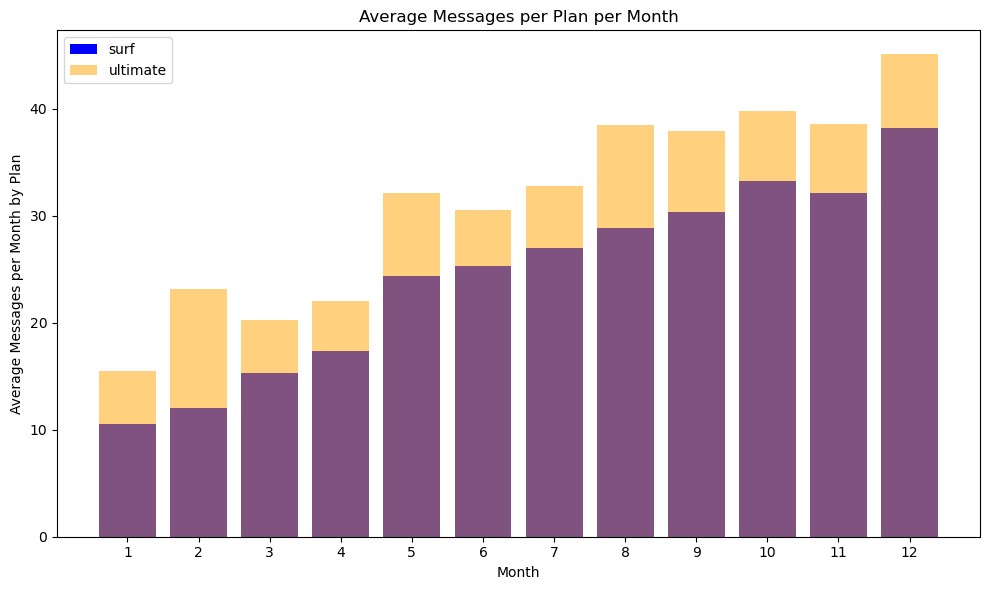

In [156]:
# Compare the number of messages users of each plan tend to send each month

# plan_id = 1 is surf, plan_id = 2 is ultimate
avg_messages = calls_minutes_internet_df.groupby(['plan_id', 'month'])['num_messages'].mean().reset_index() # grouping the dataset
avg_messages_surf = avg_messages[avg_messages['plan_id'] == 1] # df for surf plan
avg_messages_ultimate = avg_messages[avg_messages['plan_id'] == 2] # df for ultimate plan


plt.figure(figsize=(10, 6))
plt.bar(avg_messages_surf['month'], avg_messages_surf['num_messages'], label='surf', color='blue')
plt.bar(avg_messages_ultimate['month'], avg_messages_ultimate['num_messages'], label='ultimate', color='orange', alpha=0.5)

plt.xlabel('Month')
plt.ylabel('Average Messages per Month by Plan')
plt.title('Average Messages per Plan per Month')
plt.xticks(avg_call_duration_surf['month'])

plt.legend()
plt.tight_layout()
plt.show()

In [157]:
# Finding the variance, standard deviation and mean for messages by month.

messages_dispersion = pd.DataFrame(calls_minutes_internet_df.groupby(['month', 'plan_id'])['num_messages'].agg(['mean', 'var', 'std']))
messages_dispersion


mean          var        std
month plan_id                                   
1     1        10.500000   220.500000  14.849242
      2        15.500000   313.666667  17.710637
2     1        12.000000   386.000000  19.646883
      2        23.166667   552.566667  23.506737
3     1        15.260870   346.565217  18.616262
      2        20.250000   654.386364  25.580977
4     1        17.400000   501.591837  22.396246
      2        22.047619   544.147619  23.326972
5     1        24.386667   862.916036  29.375433
      2        32.103448  1297.310345  36.018195
6     1        25.281250   924.520066  30.405922
      2        30.533333   862.118182  29.361849
7     1        27.025000   931.671639  30.523297
      2        32.830508   960.488019  30.991741
8     1        28.855346  1046.681474  32.352457
      2        38.478873  1196.367404  34.588544
9     1        30.376963  1002.825572  31.667421
      2        37.895349  1050.918331  32.417871
10    1        33.267241  1278.707494  35.759020
      2        39.800000  1219.238462  34.917595
11    1        32.115523  1070.696751  32.721503
      2        38.579365  1242.437651  35.248229
12    1        38.212219  1474.206431  38.395396
      2        45.087248  1549.309904  39.361274

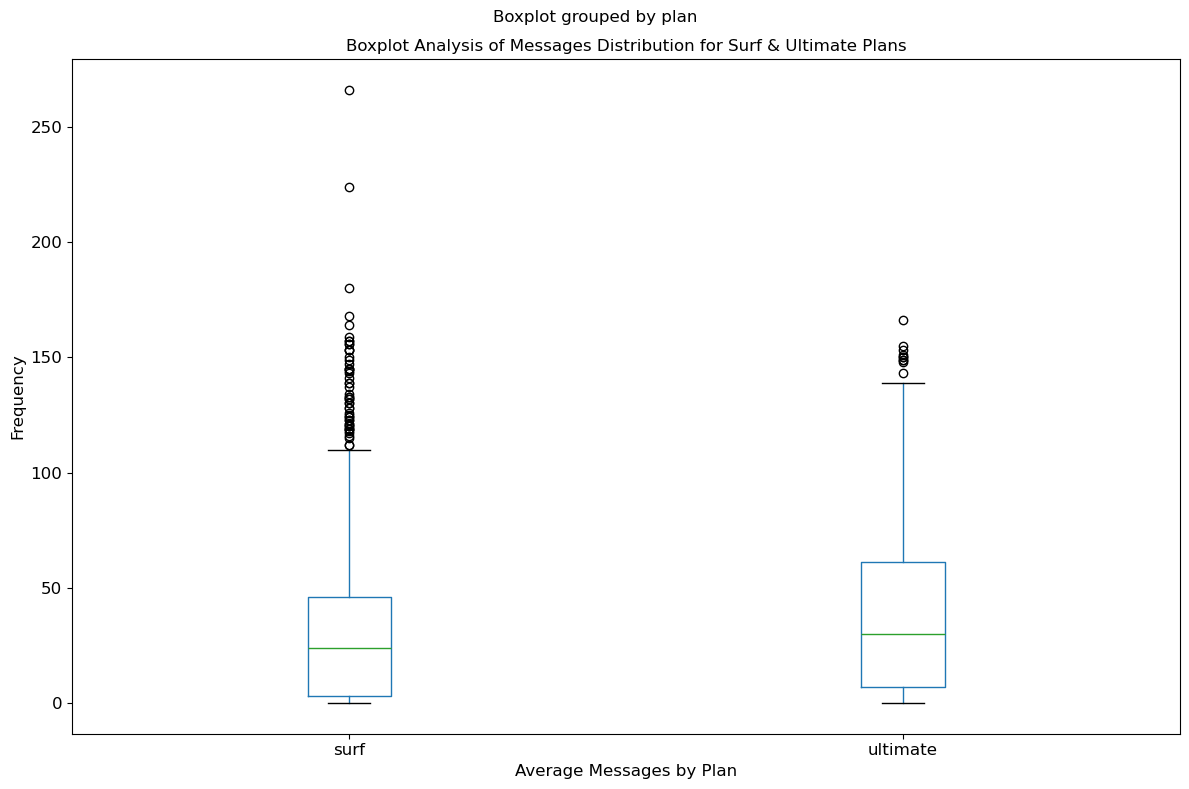

In [158]:
# Plot a boxplot to visualize the distribution of the number of messages

calls_minutes_internet_df.boxplot(['num_messages'], by='plan', figsize=(12, 8), fontsize=12, grid=False)
plt.xlabel('Average Messages by Plan', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Boxplot Analysis of Messages Distribution for Surf & Ultimate Plans', fontsize=12)
plt.tight_layout()
plt.show()

 **Observations**

In terms of typical user behavior based on their plan, there is relatively little variation between Surf plan users compared to Ultimate plan users. Users across both plans tend to send a similar number of messages on average, with Surf plan users sending approximately 24 messages per month on average and Ultimate plan users sending around 31 messages per month on average.

For Surf plan users, about 75% of them typically stay within the 50-message monthly limit, although some users exceed this limit occasionally without often surpassing 1000 messages per month. On the other hand, for Ultimate plan users, approximately 75% of them stay below the 150-message monthly limit, but there are instances where some users exceed this limit, though they generally do not exceed 1000 messages per month.

Overall, while there are minor differences in usage patterns between the plans, both sets of users tend to remain within their respective plan limits, even when sending a relatively large number of messages per month.

In [159]:
# Finding the variance, standard deviation and mean for internet traffic by month.
internet_dispersion = pd.DataFrame(calls_minutes_internet_df.groupby(['month', 'plan_id'])['internet_used_gb'].agg(['mean', 'var', 'std']))
internet_dispersion


mean         var        std
month plan_id                                  
1     1         5.000000   18.000000   4.242641
      2         7.250000   14.916667   3.862210
2     1        12.222222   41.444444   6.437736
      2        18.000000   41.200000   6.418723
3     1        13.565217   63.984190   7.999012
      2        18.416667  138.628788  11.774073
4     1        12.220000   56.215918   7.497728
      2        16.333333   85.833333   9.264628
5     1        14.373333   57.020901   7.551219
      2        16.862069   54.194581   7.361697
6     1        15.489583   48.252522   6.946404
      2        16.044444   64.543434   8.033893
7     1        16.908333   62.016737   7.875071
      2        16.491525   64.254237   8.015874
8     1        16.968553   71.967359   8.483358
      2        17.887324   57.787123   7.601784
9     1        16.549738   47.396197   6.884490
      2        17.069767   47.124487   6.864728
10    1        17.362069   60.266607   7.763157
      2        17.895238   52.210073   7.225654
11    1        16.411552   51.061895   7.145761
      2        17.119048   55.097714   7.422783
12    1        18.102894   62.260346   7.890523
      2        18.429530   55.625068   7.458222

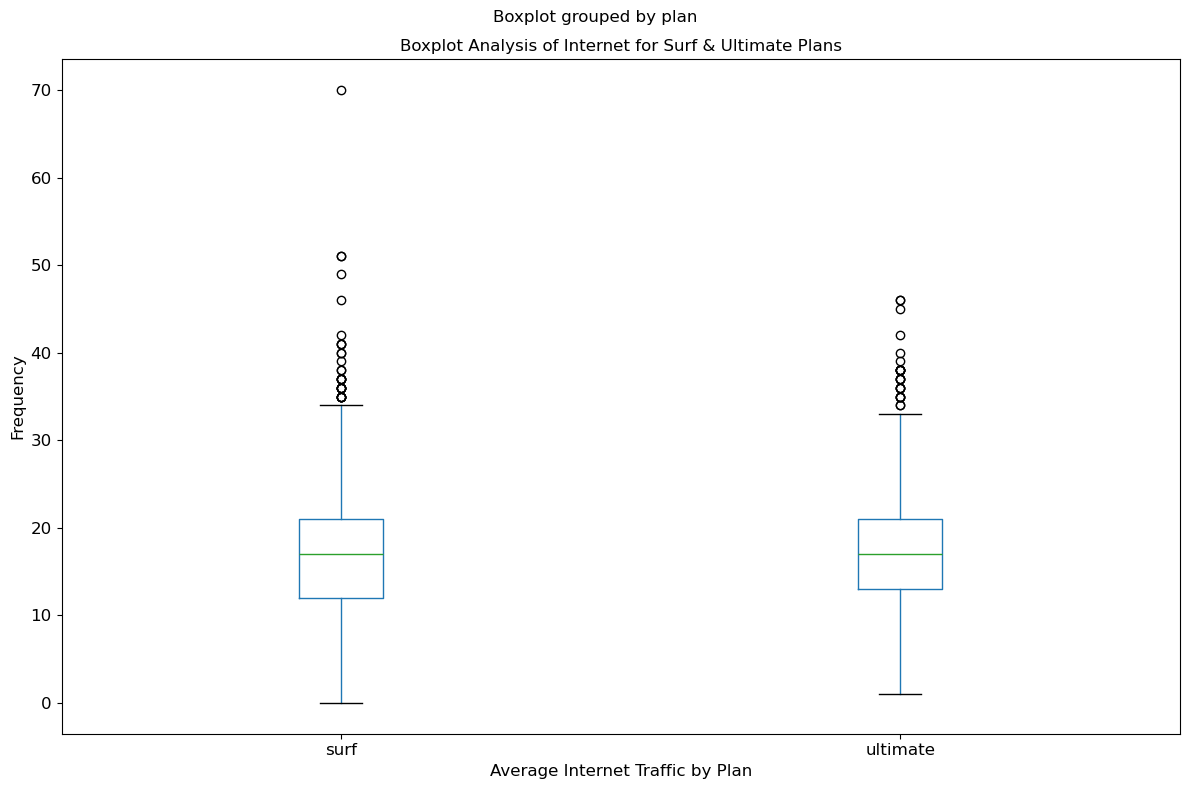

In [160]:
# Plot a boxplot to visualize the distribution of internet traffic

calls_minutes_internet_df.boxplot(['internet_used_gb'], by='plan', figsize=(12, 8), fontsize=12, grid=False)
plt.xlabel('Average Internet Traffic by Plan', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Boxplot Analysis of Internet for Surf & Ultimate Plans', fontsize=12)
plt.tight_layout()
plt.show()

**Observations**

Just like messages and call durations, there is little variation in internet traffic behavior between users on different plans. On average, users from both plans tend to consume a similar amount of data. As illustrated in the boxplot provided, approximately 75% of users from both plans utilize comparable data volumes. Nevertheless, a significant portion of users on the 'surf' plan often surpass their 15 GB monthly limit.

## Data Observation: Revenue

In [161]:
# Finding the variance, standard deviation and mean for revenue by month.
revenue_dispersion = pd.DataFrame(calls_minutes_internet_df.groupby(['month', 'plan_id'])['total_revenue'].agg(['mean', 'var', 'std']))
revenue_dispersion


mean          var        std
month plan_id                                   
1     1        20.000000     0.000000   0.000000
      2        70.000000     0.000000   0.000000
2     1        34.396667   428.276100  20.694833
      2        70.000000     0.000000   0.000000
3     1        45.941304  1512.023512  38.884747
      2        74.666667   145.515152  12.062966
4     1        40.710600  1198.958402  34.625979
      2        73.000000   120.400000  10.972693
5     1        48.364933  1999.536501  44.716177
      2        70.724138    15.206897   3.899602
6     1        49.581250  2000.733887  44.729564
      2        71.711111    78.301010   8.848786
7     1        63.029667  2966.853437  54.468830
      2        71.898305   104.472238  10.221166
8     1        64.508491  3644.413513  60.368978
      2        72.859155   154.808451  12.442204
9     1        57.138586  2095.201408  45.773370
      2        72.034884    75.939945   8.714353
10    1        64.968276  3169.857978  56.301492
      2        72.333333   171.185897  13.083803
11    1        57.233827  2265.456838  47.596815
      2        71.777778    97.950222   9.896980
12    1        69.275595  3950.476929  62.852820
      2        73.100671   214.793851  14.655847

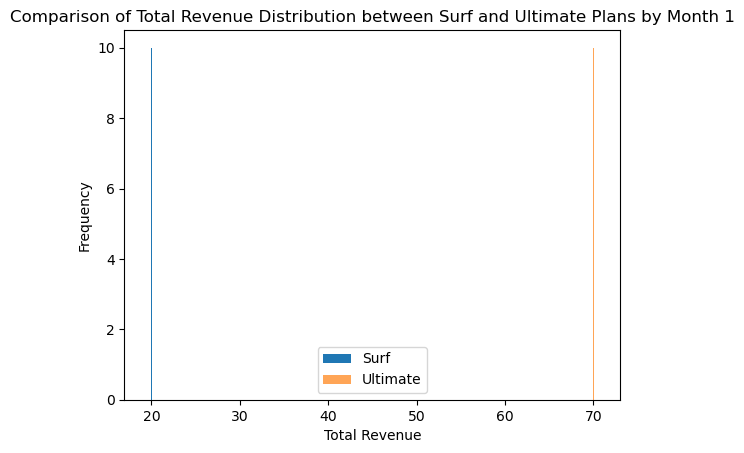

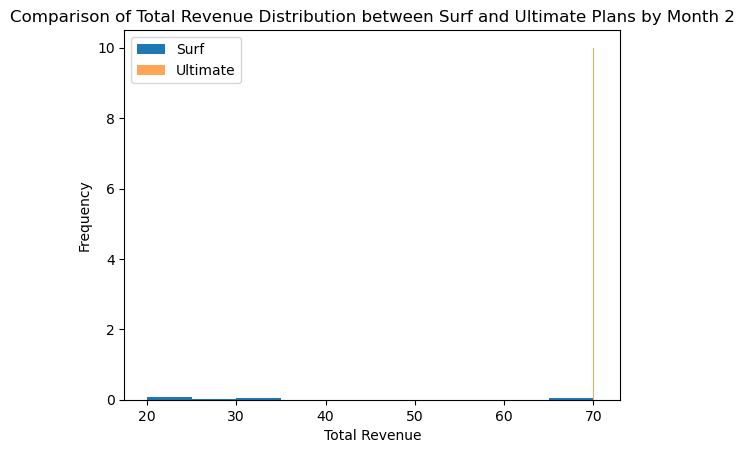

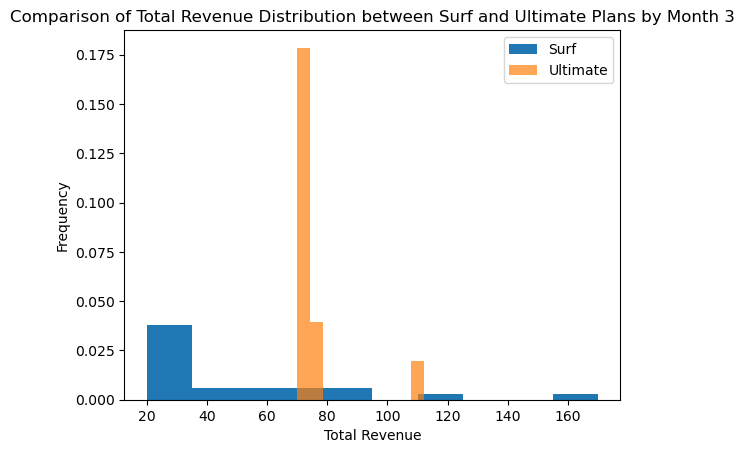

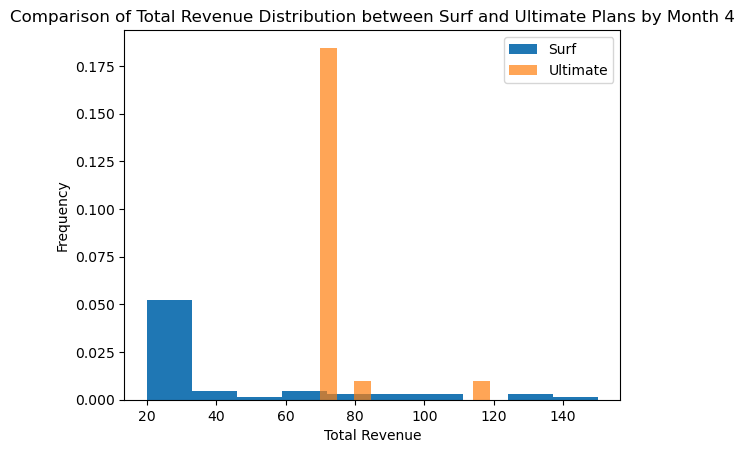

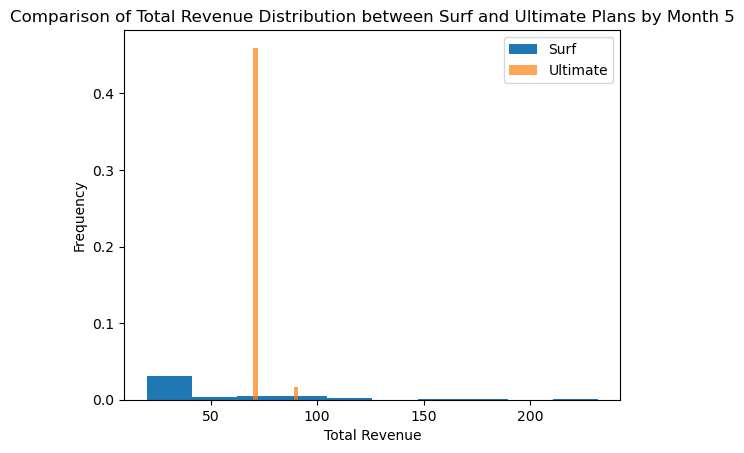

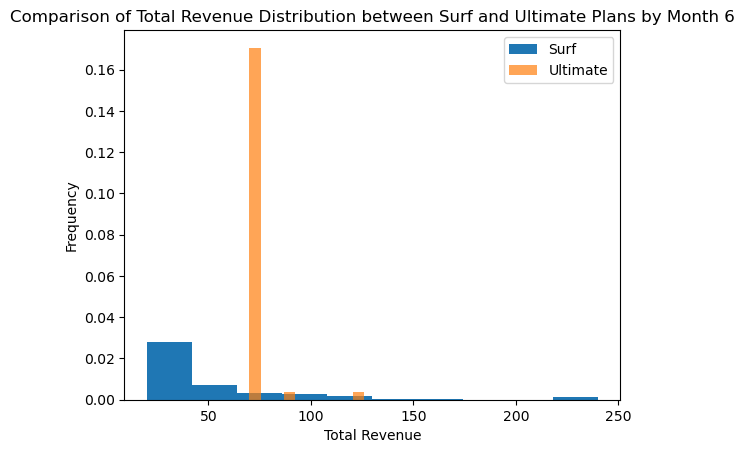

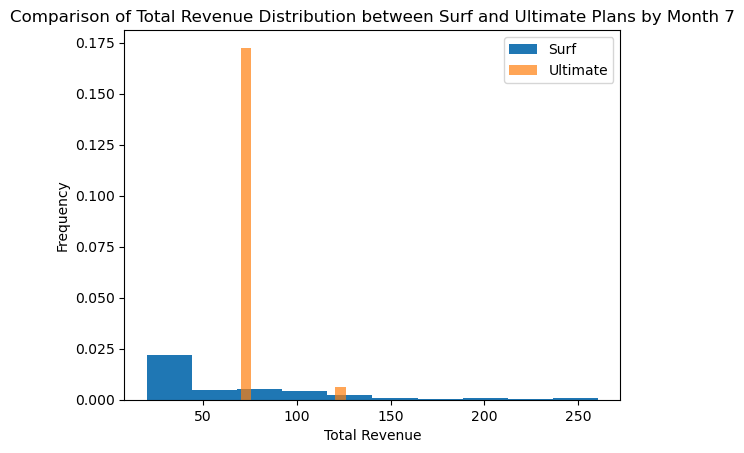

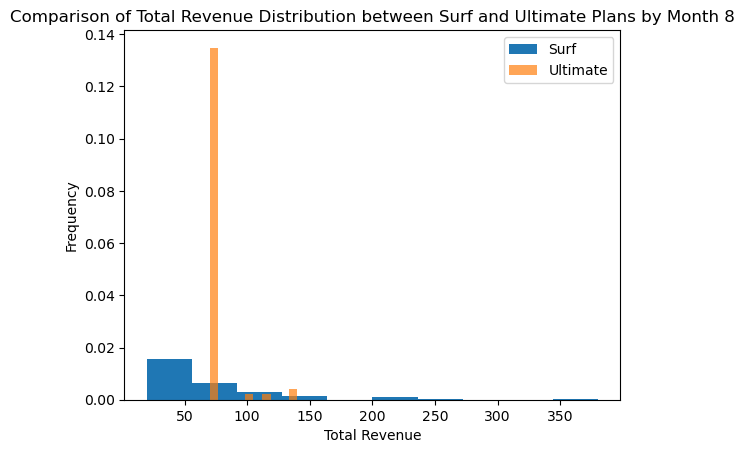

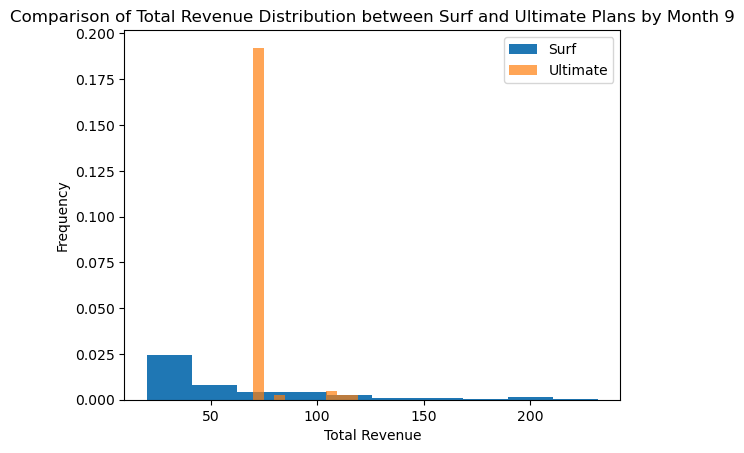

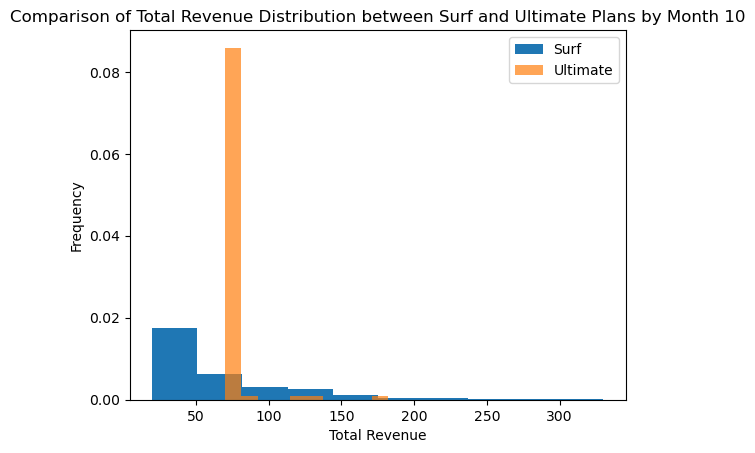

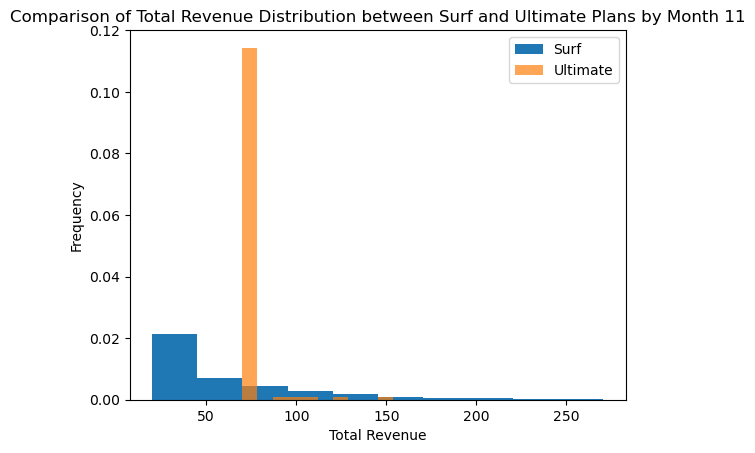

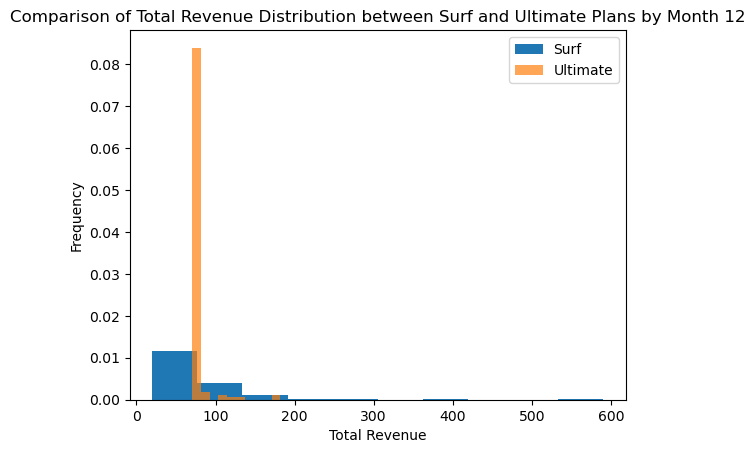

In [162]:
# Plot a boxplot to visualize the distribution of internet traffic

# plan_id = 1 is surf, plan_id = 2 is ultimate
for month in range(1, 13):
    filtered_month = calls_minutes_internet_df[(calls_minutes_internet_df['plan_id'] == 1) & (calls_minutes_internet_df['month'] == month)]
    filtered_month['total_revenue'].plot(kind='hist', density=True, label='Surf')
    filtered_month = calls_minutes_internet_df[(calls_minutes_internet_df['plan_id'] == 2) & (calls_minutes_internet_df['month'] == month)]
    filtered_month['total_revenue'].plot(kind='hist', density=True, alpha=0.7, label="Ultimate")
    plt.xlabel('Total Revenue')
    plt.ylabel('Frequency')
    plt.title(f'Comparison of Total Revenue Distribution between Surf and Ultimate Plans by Month {month}')
    plt.legend()
    plt.show()

**Observations**

Differences in total revenue between the two plans can be observed in contrast to user behavior. Analysis of monthly plan limits and user behavior provides evidence suggesting that users on the ultimate plan generate higher revenue.

## Test Statistical Hypotheses

### Hypothesis Testing: Testing that there is no difference in the average revenue between users on the surf and ultimate plans

**Null Hypothesis**
* Ho: There is no difference in the average revenue between users on the surf and ultimate plan

**Alternate Hypothesis**
* H1: There is a difference in the average revenue between users on the surf and ultimate plan

**Alpha Value**
* 5% (0.05)

In [163]:
# Separating the revenue into two samples (plan 1 = surf & plan 2 = ultimate).
revenue_surf_plan = calls_minutes_internet_df[calls_minutes_internet_df['plan_id'] == 1]
revenue_ultimate_plan = calls_minutes_internet_df[calls_minutes_internet_df['plan_id'] == 2]

# Testing the hypothesis for two samples (surf & ultimate plan
alpha = 0.05
results_total_rev = st.ttest_ind(revenue_surf_plan['total_revenue'], revenue_ultimate_plan['total_revenue'])

print(f"p-value: {results_total_rev.pvalue}")

# Comparing the pvalue to the alpha value
if results_total_rev.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 3.0009834523969374e-09
We reject the null hypothesis


### Hypothesis Testing: Testing that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.

**Null Hypothesis**
* Ho: There is no difference in the average revenue between users from NY-NJ area on the surf and ultimate plan compared to other regions

**Alternate Hypothesis**
* H1: There is a difference in the average revenue between users from NY-NJ area on the surf and ultimate plan compared to other regions

**Alpha Value**
* 5% (0.05)

In [164]:
# Separating out the NY-NJ Area data
ny_nj_revenue = calls_minutes_internet_df[calls_minutes_internet_df['city'] == "New York-Newark-Jersey City, NY-NJ-PA MSA"]

# Separating all other regions
all_other_revenue = calls_minutes_internet_df[calls_minutes_internet_df['city'] != "New York-Newark-Jersey City, NY-NJ-PA MSA"]

# Test the hypotheses
alpha = 0.05
results_region_total_rev = st.ttest_ind(ny_nj_revenue['total_revenue'], all_other_revenue['total_revenue'])

print(f"p-value: {results_region_total_rev.pvalue}")

# Comparing the pvalue to the alpha value
if results_region_total_rev.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.017628733934974047
We reject the null hypothesis


## Conclusion

In [165]:
# Counting number of users in dataset
calls_minutes_internet_df['user_id'].unique().sum()

601556

Based on the analysis of a dataset comprising 601,556 users, compelling evidence suggests a notable difference in total revenue between users on the Surf and Ultimate plans. However, the analysis reveals limited evidence supporting behavioral distinctions between users on these plans. Surprisingly, users on both plans demonstrate similar patterns in monthly usage metrics such as minutes used, messages sent, and internet traffic.

Conducting a hypothesis test to ascertain the statistical significance of the difference in total revenue between Surf and Ultimate plan users, utilizing a significance level of 5%, yielded results that strongly reject the null hypothesis. Therefore, it can be concluded definitively that there exists a distinct variation in total revenue between these two plans.